

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

# Every question is of 1 mark.

## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Probabilty Distributions

5) Linear Regression

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [1]:
import pandas as pd
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

In [13]:
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

t_statistic, p_value = ttest_ind(GPU1, GPU2)
print("Two sample t-test, p-value", t_statistic, p_value)

if p_value > 0.05 :
    print("We have to accept NULL hypothesis as the p-value is greater than 5%")
else :
    print("We have to reject NULL hypothesis as the p-value is less than 5%")

Two sample t-test, p-value [-2.62762951] [0.01379428]
We have to reject NULL hypothesis as the p-value is less than 5%


[## Question 2 
](https://)
He is trying a third GPU which is GPU3.

In [6]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [14]:
t_statistic, p_value = ttest_ind(GPU1, GPU3)
print("Two sample t-test, p-value", t_statistic, p_value)

if p_value > 0.05 :
    print("We have to accept NULL hypothesis as the p-value is greater than 5%")
else :
    print("We have to reject NULL hypothesis as the p-value is less than 5%")

Two sample t-test, p-value [-1.49889438] [0.14509211]
We have to accept NULL hypothesis as the p-value is greater than 5%


In [261]:
print("SInce the value is greater than 5%, there is a significant diff b/w GPU1 and GPU3")

SInce the value is greater than 5%, there is a significant diff b/w GPU1 and GPU3


### ANOVA

## Question 3 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [111]:
import pandas as pd
e1 = pd.DataFrame([1.595440,1.419730,0.000000,0.000000])
e2 = pd.DataFrame([1.433800,2.079700,0.892139,2.384740])
e3 = pd.DataFrame([0.036930,0.938018,0.995956,1.006970])

In [124]:
from scipy.stats import levene, shapiro, f_oneway

levene(e1[0],e2[0],e3[0])


LeveneResult(statistic=2.6741725711150446, pvalue=0.12259792666001798)

In [ ]:
print("From the levene result we have pvalue as 0.12225 which is greater than 5%, which was satisfied")

Hint - You can use stats.levene function and stats.f_oneway function.

#### Answer:

In [125]:
f, p = f_oneway(e1,e2,e3)
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

One-way ANOVA
F value: [2.51357623]
P value: [0.13574645] 



## Question 4 

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

In [129]:
#A type I error (false-positive) occurs if an investigator rejects a null hypothesis that is actually true in the population;

In [130]:
#A type II error (false-negative) occurs if the investigator fails to reject a null hypothesis that is actually false in the population.

# Question 5
You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

In [157]:
print("NULL hypothesis: Wait time should be 4.5 mins")

NULL hypothesis: Wait time should be 4.5 mins


In [158]:
print("Alternative hypothesis: Wait time should not be 4.5 mins")

Alternative hypothesis: Wait time should not be 4.5 mins


# Question 6 
Get the binomial distribution with n = 10, p = .7 and k = [0, 1, 2, 3, 4, 5, 6, 7]

Hint - Use stats.binom.pmf() function for this.


In [67]:
from scipy import stats
n=10
p=0.7
k=[0,1,2,3,4,5,6,7]
rv=stats.binom.pmf(k,n,p)
rv

array([5.90490000e-06, 1.37781000e-04, 1.44670050e-03, 9.00169200e-03,
       3.67569090e-02, 1.02919345e-01, 2.00120949e-01, 2.66827932e-01])

# Question 7 
Plot the distribution created in the above question.

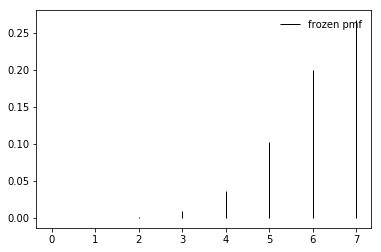

In [70]:
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

ax.vlines(k, 0, rv, colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

# Linear Regression


# Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

There is one unnamed column also in this dataset. Please remove and ignore that coloumn.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 8 
Read the dataset given in file named 'bigcity.csv'.

In [255]:
df=pd.read_csv('bigcity.csv')
df.head(10)

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75
5,6,37,63
6,7,29,50
7,8,23,48
8,9,30,111
9,10,2,50


# Question 9 - Transform the dataset 
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can shape function to get the size of the dataframe


In [256]:
df.shape

(49, 3)

In [257]:
df.head(10)
X=df['u']

Y=df['x']


In [258]:
#df=df.drop(df.columns[0])
df=df.drop(df.columns[0],axis=1)
df

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75
5,37,63
6,29,50
7,23,48
8,30,111
9,2,50


## Question 10 - Check the dataset for any missing values and also print out the correlation matrix 

In [159]:
df.isna().sum()

u    0
x    0
dtype: int64

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [149]:
df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


### The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# Question 11 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [221]:
print("shape of x train",X_train.shape)
print("shape of y train",y_train.shape)
print("shape of x test",X_test.shape)
print("shape of y test",y_test.shape)



shape of x train (39,)
shape of y train (39,)
shape of x test (10,)
shape of y test (10,)


In [222]:
X_train

32     45
14    298
43    116
19    387
41     56
36     66
24     77
3     179
7      23
37     46
23     50
10     38
21     60
4      48
48     36
15     74
27    136
30     94
25     64
13     25
47    161
18    381
8      30
42     40
29    256
2      61
6      29
35    172
20     78
40     64
28    243
39     44
45     43
46     43
26     40
34    120
16     50
38    121
1      93
Name: u, dtype: int64

# Question 12 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

In [231]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(pd.DataFrame(X_train),pd.DataFrame(y_train))


In [233]:
reg.coef_

array([[1.12077977]])

In [234]:
reg.intercept_

array([12.13977105])

Check: coef_ and intercept_ functions can help you get coefficients & intercept

# Question 13 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

Hint - y = mx + c, plot y

In [260]:
y=12.13977105+ 1.12077977*X_train
y

32     62.574861
14    346.132143
43    142.150224
19    445.881542
41     74.903438
36     86.111236
24     98.439813
3     212.759350
7      37.917706
37     63.695640
23     68.178760
10     54.729402
21     79.386557
4      65.937200
48     52.487843
15     95.077474
27    164.565820
30    117.493069
25     83.869676
13     40.159265
47    192.585314
18    439.156863
8      45.763164
42     56.970962
29    299.059392
2      80.507337
6      44.642384
35    204.913891
20     99.560593
40     83.869676
28    284.489255
39     61.454081
45     60.333301
46     60.333301
26     56.970962
34    146.633343
16     68.178760
38    147.754123
1     116.372290
Name: u, dtype: float64

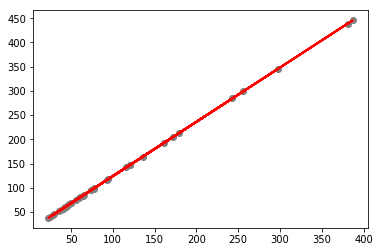

In [252]:
import matplotlib.pyplot as plt


plt.scatter(X_train, y,  color='gray')
plt.plot(X_train, y, color='red', linewidth=2)

# Question 14 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [242]:

y_pred = reg.predict(pd.DataFrame(X_test))

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)

rmse = sqrt(mse)
rmse

24.18337140963559

## Question 15 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [245]:
reg.score(pd.DataFrame(X_test),pd.DataFrame(y_test))

0.9796730276338177

In [246]:
print("The value approaches to 1, which means the regression model can be termed as close to accurate")

The value approaches to 1, which means the regression model can be termed as close to accurate
